## LSTM - With RDA data representation approach *Displacement/Distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
to_store_path = r'D:\2 Thesis\2 models\2023.07.02 all models\LSTM_02\prediction csv\v1_lstm_pred_output_rel_dist.csv'

In [13]:
X_train = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_X_v8_out.npy')
Y_train_dist =np.load(r'D:\2 Thesis\1 train datasets\2 train rda\1 train\data_2019_train_Y_v8_rel_dist_out.npy')

X_val = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_X.npy')
Y_val_dist = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\2 val\data_2019_11_Y_array_distance_m_s.npy')

X_test = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_X.npy')
Y_test_dist = np.load(r'D:\2 Thesis\1 train datasets\2 train rda\3 test\data_2019_12_Y_array_distance_m_s.npy')


In [4]:
## Checkpoint save - dist
checkpoint_filepath_dist = r'D:\2 Thesis\2 models\2023.07.02 all models\LSTM_02\best model rda ds\lstm_rel_dis_best_model_v3_dense10_try again.h5'

In [5]:
X_train = X_train.astype("float32") 
Y_train_dist = Y_train_dist.astype("float32") 


X_val = X_val.astype("float32") 
Y_val_dist = Y_val_dist.astype("float32") 

In [6]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


In [7]:
train_gen_dist = DataGenerator(X_train, Y_train_dist, 200)
val_gen_dist = DataGenerator(X_val, Y_val_dist, 200)

In [8]:
## the LSTM model

def lstm_model(n_steps_input, n_steps_output, n_features):
    model = Sequential()
    model.add(LSTM(74, activation="tanh", input_shape=(n_steps_input, n_features), return_sequences=True))
    model.add(LSTM(74, activation="tanh"))
    model.add(Dense(10))
    
    return model

model_rel_dist = lstm_model(n_steps_input = 10, n_steps_output = 10  , n_features = 8 )
model_rel_dist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 74)            24568     
                                                                 
 lstm_1 (LSTM)               (None, 74)                44104     
                                                                 
 dense (Dense)               (None, 10)                750       
                                                                 
Total params: 69,422
Trainable params: 69,422
Non-trainable params: 0
_________________________________________________________________


In [9]:


# Compile the model
model_rel_dist.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'mean_squared_error', metrics=['mae'] )
checkpoint_rel_dist = ModelCheckpoint(checkpoint_filepath_dist, monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history_rdist = model_rel_dist.fit(train_gen_dist, validation_data = val_gen_dist, epochs=20, verbose=1, callbacks = [checkpoint_rel_dist])   

Epoch 1/20
54621/54621 [==============================] - 658s 12ms/step - loss: 0.0012 - mae: 0.0156 - val_loss: 9.4347e-04 - val_mae: 0.0142
Epoch 2/20
54621/54621 [==============================] - 633s 12ms/step - loss: 8.5524e-04 - mae: 0.0127 - val_loss: 7.1028e-04 - val_mae: 0.0113
Epoch 3/20
54621/54621 [==============================] - 622s 11ms/step - loss: 7.6724e-04 - mae: 0.0118 - val_loss: 6.5421e-04 - val_mae: 0.0111
Epoch 4/20
54621/54621 [==============================] - 623s 11ms/step - loss: 7.1371e-04 - mae: 0.0113 - val_loss: 6.3203e-04 - val_mae: 0.0105
Epoch 5/20
54621/54621 [==============================] - 637s 12ms/step - loss: 6.7419e-04 - mae: 0.0109 - val_loss: 6.1657e-04 - val_mae: 0.0110
Epoch 6/20
54621/54621 [==============================] - 628s 11ms/step - loss: 6.4024e-04 - mae: 0.0106 - val_loss: 5.4571e-04 - val_mae: 0.0097
Epoch 7/20
54621/54621 [==============================] - 611s 11ms/step - loss: 6.0961e-04 - mae: 0.0103 - val_loss: 5.50

In [14]:
import tensorflow as tf 
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


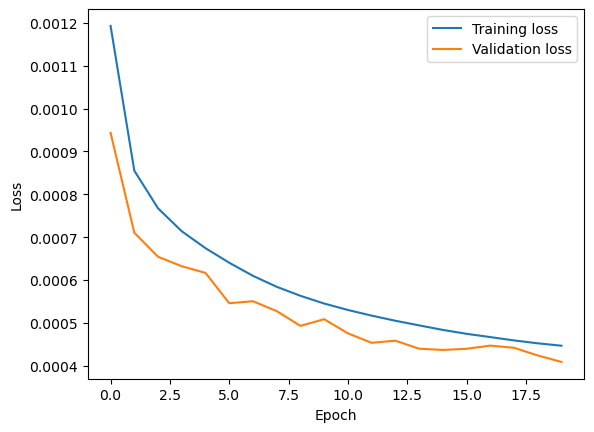

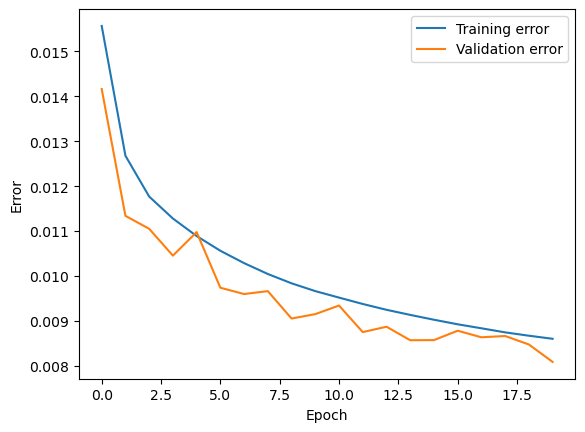

In [10]:
# Plot the training and validation loss
plt.plot(history_rdist.history['loss'], label='Training loss')
plt.plot(history_rdist.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation error
plt.plot(history_rdist.history['mae'], label='Training error')
plt.plot(history_rdist.history['val_mae'], label='Validation error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.models import load_model

best_model_dist = load_model(checkpoint_filepath_dist)

In [14]:
# Evaluate the model
Y_test_pred_dist = best_model_dist.predict(X_test)

28322/28322 [==============================] - 102s 4ms/step


In [15]:
Y_test_dist = Y_test_dist.squeeze()

In [16]:
mse_rel_dist = mean_squared_error(Y_test_dist, Y_test_pred_dist)
print("Mean Squared Error_test_pred_relative_distance:", mse_rel_dist)

Mean Squared Error_test_pred_relative_distance: 0.00038521011664565546


In [17]:
Y_pred_dist_flat = Y_test_pred_dist.flatten()
Y_pred_df = pd.DataFrame(Y_pred_dist_flat, columns=['rel_dist_pred_s'])

Y_test_dist_flat = Y_test_dist.flatten()
Y_test_df = pd.DataFrame(Y_test_dist_flat, columns=['rel_dist_s'])

# Concatnating the lat lon test data - to on df
Y_rel_dist_df = pd.concat([Y_test_df, Y_pred_df], axis=1)

In [19]:
# converting back to lat long degrees

min_rel_dist, max_rel_dist = 0, 6000
Y_rel_dist_df['rel_dist_pred'] = Y_pred_df['rel_dist_pred_s'] * (max_rel_dist - min_rel_dist) + min_rel_dist
Y_rel_dist_df['rel_dist'] = Y_test_df['rel_dist_s'] * (max_rel_dist - min_rel_dist) + min_rel_dist

In [21]:
Y_rel_dist_df.to_csv(to_store_path)
